# Render Contours

author = Caroline Magg <br>
date = 05 May 2020 <br>

___________________________________
history: <br>


TODO: 

In [22]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pydicom
from natsort import natsorted
import scipy
import time
import logging as log
import skimage.segmentation as segmentation

In [23]:
log.basicConfig(format='%(levelname)s:%(message)s', level=log.INFO)

### Add dependencies

In [24]:
# add KidsBrainProject main folder to paths
sys.path.append(os.path.abspath('../../'))
sys.path.append(os.path.abspath('../utils/'))

In [25]:
#from utils_explore import read_structure,read_contour,read_contour_names,read_contour_row
from PatientData import PatientData
from DicomWrapper import DicomWrapper
from Segmentation import Segmentation

In [26]:
# add path to data here
path_data = "../../Data/" 

### Explore folder structure and naming

In [27]:
idx = 1
folder_name = os.path.join(path_data, str(idx))
folder = os.listdir(folder_name)
folder

['Contours',
 'CT',
 'RD.Jacks1IMPT.dcm',
 'RD.Jacks1IMPTb.dcm',
 'RS.Jacks1.dcm',
 'T1 +C 3-15-16',
 'T1 +C 3-23-16',
 'T1 +C 4-29-16',
 'T2 CISS 3-15-16',
 'T2 CUBE 4-29-16']

In [28]:
contours_list = pd.read_csv("list_contours.csv",delimiter=';')
contours_list

,Number,RoiName
0,1,Brain
1,2,Cerebel
2,3,Cingulum
3,4,Corpus callosum
4,5,CTV
5,6,Entorhinal
6,7,Fornix
7,8,FrontalLobe
8,9,GTV
9,10,Hippocampus


In [29]:
contour_of_interest = ["PTV","GTV","CTV"]

# PatientData

In [30]:
files = os.listdir(os.path.join(path_data, str(idx)))
path_contour = os.path.join(path_data, str(idx), 'RS.Jacks1.dcm')
path_preop = os.path.join(path_data, str(idx), 'CT')
path_postop1 = [os.path.join(path_data, str(idx), fn) for fn in [x for x in files if 'T1' in x]]
dcm = pydicom.dcmread(path_contour)
path_contour, path_preop, path_postop1

('../../Data/1\\RS.Jacks1.dcm',
 '../../Data/1\\CT',
 ['../../Data/1\\T1 +C 3-15-16',
  '../../Data/1\\T1 +C 3-23-16',
  '../../Data/1\\T1 +C 4-29-16'])

In [31]:
data = PatientData(path_preop, path_postop1, path_contour)

INFO:
Preop dicom
INFO:Debug on
INFO:Image size.......: (512, 512, 292)
INFO:Pixel spacing....: (0.9765625, 0.9765625, 1.0)
INFO:Slices number....: 292
INFO:Slices location...: 346.5 - 55.5
INFO:Position.........: (-250.0, -217.0, 346.5)
INFO:Resulting correction: [251.0, 218.0, 0]
INFO:
Postop ../../Data/1\T1 +C 3-15-16
INFO:Debug on
INFO:Image size.......: (512, 512, 292)
INFO:Pixel spacing....: (0.9765625, 0.9765625, 1.0)
INFO:Slices number....: 292
INFO:Slices location...: 346.5 - 55.5
INFO:Position.........: (-250.0, -217.0, 346.5)
INFO:Resulting correction: [251.0, 218.0, 0]
INFO:
Postop ../../Data/1\T1 +C 3-23-16
INFO:Debug on
INFO:Image size.......: (512, 512, 292)
INFO:Pixel spacing....: (0.9765625, 0.9765625, 1.0)
INFO:Slices number....: 292
INFO:Slices location...: 346.5 - 55.5
INFO:Position.........: (-250.0, -217.0, 346.5)
INFO:Resulting correction: [251.0, 218.0, 0]
INFO:
Postop ../../Data/1\T1 +C 4-29-16
INFO:Debug on
INFO:Image size.......: (512, 512, 292)
INFO:Pixel sp

In [32]:
data.get_all_contour_names()

array(['Amydgala left', 'Amydgala right', 'Ant Thalamus L',
       'Ant Thalamus R', 'Body', 'Brain', 'BrainInfratent',
       'BrainSupraTent', 'Brainstem', 'BrainstemCore', 'BrainstemSurf',
       'C1A', 'CG L', 'CG R', 'CTV', 'Cerebel ANT YL', 'Cerebell POST YL',
       'Cerebellum Jacks', 'CerebellumAnt LT', 'Cingulum left',
       'Cingulum right', 'CochleaLt', 'CochleaRt', 'Corpus callosum',
       'Dentate nucleus', 'Dose 102.8[%]', 'Dose 103.7[%]', 'Dose 104[%]',
       'Dose 95[%]', 'Entorhinal cor.L', 'Entorhinal cor.R',
       'ExtraThalamic L', 'ExtraThalamic R', 'FS', 'Fornix',
       'FrontalLobe_L', 'FrontalLobe_R2', 'GTV', 'HP', 'HippoHeadLt',
       'HippoHeadRt', 'HippoTailLt', 'HippoTailRt', 'HippocampusLt',
       'HippocampusRt', 'Hypothalamus', 'LFWM', 'LIP', 'LM', 'LSW',
       'LacrimalLt', 'LacrimalRt', 'LensLt', 'LensRt', 'Mam. bodies',
       'Mam.thal.tract L', 'Mam.thal.tract R', 'MastoidLt', 'MastoidRt',
       'Medulla C1', 'Medulla C2C3', 'NPX', 'NonTarg

In [33]:
struct = ["Brain", "PTV1","PTV2", "GTV","CTV","Scalp","Corpus callosum"]
data.read_filtered_contour(roiname=struct,mode="exact")

INFO:Start filtering contour list for RoiNames ['Brain', 'PTV1', 'PTV2', 'GTV', 'CTV', 'Scalp', 'Corpus callosum'] with mode exact
INFO:Reading contour information of RoiName Brain
INFO:Reading contour information of RoiName PTV1
INFO:Reading contour information of RoiName PTV2
INFO:Reading contour information of RoiName GTV
INFO:Reading contour information of RoiName CTV
INFO:Reading contour information of RoiName Scalp
INFO:Reading contour information of RoiName Corpus callosum


In [34]:
data.get_filtered_contour_names()

1               Brain
30               PTV1
31               PTV2
9                 GTV
8                 CTV
34              Scalp
54    Corpus callosum
Name: RoiName, dtype: object

In [35]:
found = data.get_filtered_contour_names().values
index = data.contour_list_names_filtered['first'].values
found, index

(array(['Brain', 'PTV1', 'PTV2', 'GTV', 'CTV', 'Scalp', 'Corpus callosum'],
       dtype=object),
 array([28, 119, 121, 124, 122, 15, 72], dtype=object))

CTV


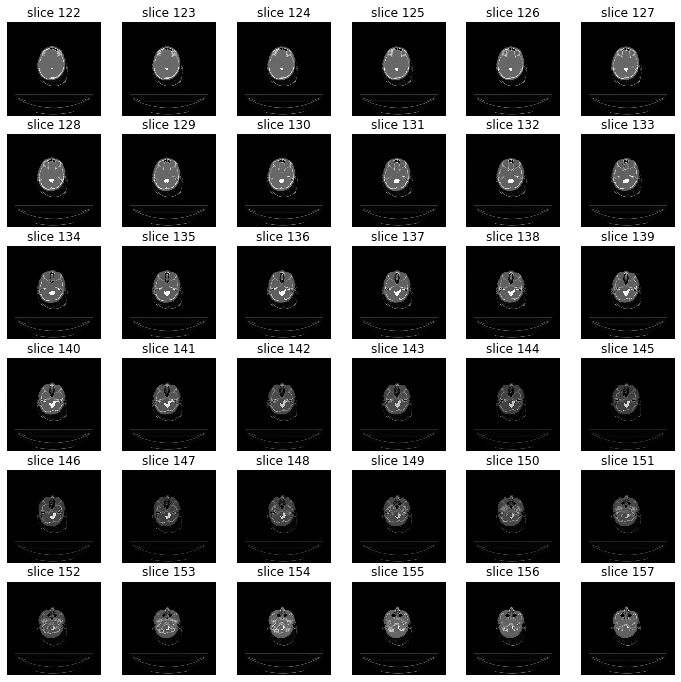

In [36]:
# visualize slices of pre op with contours
ind = 4
print(struct[ind])
data.show_slices2D_contour(struct[ind], show_every=1, start_with=index[ind])

# Segmentation

In [37]:
segmentor = Segmentation(data, debug=True)

In [38]:
segmentor.patient.contour_list_names_filtered['first'].values

array([28, 119, 121, 124, 122, 15, 72], dtype=object)

In [39]:
found = data.get_filtered_contour_names().values
index = data.contour_list_names_filtered['first'].values
found, index

(array(['Brain', 'PTV1', 'PTV2', 'GTV', 'CTV', 'Scalp', 'Corpus callosum'],
       dtype=object),
 array([28, 119, 121, 124, 122, 15, 72], dtype=object))

In [43]:
ind =0
first = 120
contour = segmentor.active_contour(found[ind], first=first, last=first+5, debug=True)
np.shape(contour)

INFO: Select data.
INFO: Start segmentation of Brain.
C:\Users\Caroline\Documents\KidsBrainProject\KidsBrainProject\utils\Segmentation.py:81: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  pts = segmentation.active_contour(image, pts_dilate, w_edge=w_edge, beta=beta)
INFO: ... slice: 120, time: 4.6562659740448
INFO: ... slice: 121, time: 0.981787919998169
INFO: ... slice: 122, time: 11.941486358642578
INFO: ... slice: 123, time: 16.728886365890503
INFO: ... slice: 124, time: 1.1918482780456543


(5, 1, 512, 512)

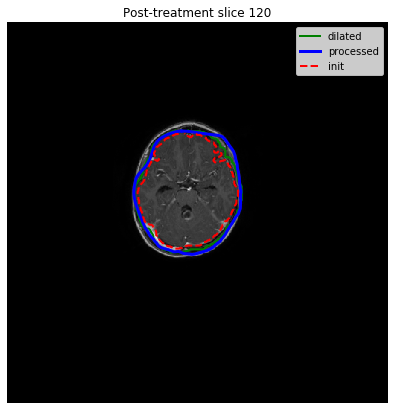

In [44]:
segmentor.show_segmentation_single(index=0)

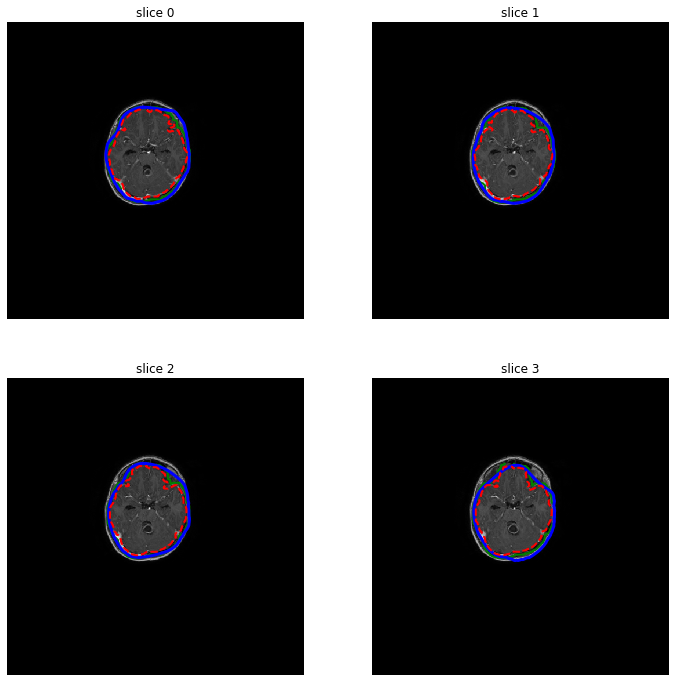

In [45]:
segmentor.show_segmentation_stack(2,2)